
## WordCloud for non-perfect reviews ( for the review_score < 5)
### for sample product_ID: 110663055 ['Gift Box']

In [3]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 


In [58]:
data = pd.read_csv('data/Yotpo_1.csv')
sample = data[data['product_id'] == '110663055']

In [8]:
sample.head()

,published,review_title,product_title,review_content,review_score,date,product_id
3,True,Husband with Sensitive Skin,Gift Box,My husband has sensitive skin and we have been...,5,2012-12-07 04:00:00+00:00,110663055
4,True,Perfect Gift!,Gift Box,"I already use this soap everyday, so I was pum...",5,2012-12-13 04:00:00+00:00,110663055
6,True,Great gift,Gift Box,I sent this gift to my son inlaw and he was i...,4,2012-12-24 04:00:00+00:00,110663055
7,True,A great birthday gift,Gift Box,This purchase was a birthday gift for my broth...,5,2012-12-25 04:00:00+00:00,110663055
16,True,Gift box a hit!!!,Gift Box,Order two...one went to wrong address...no fau...,5,2013-02-24 04:00:00+00:00,110663055


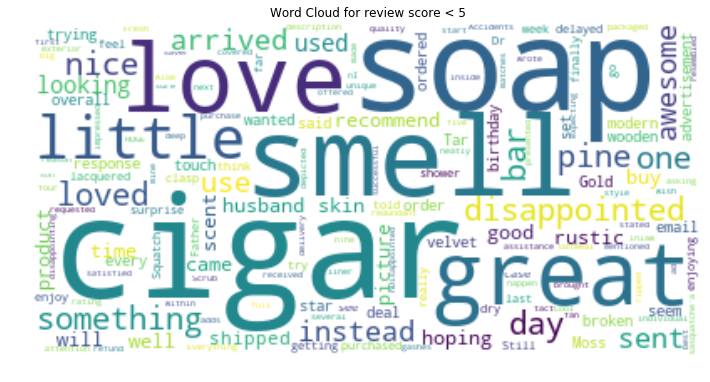

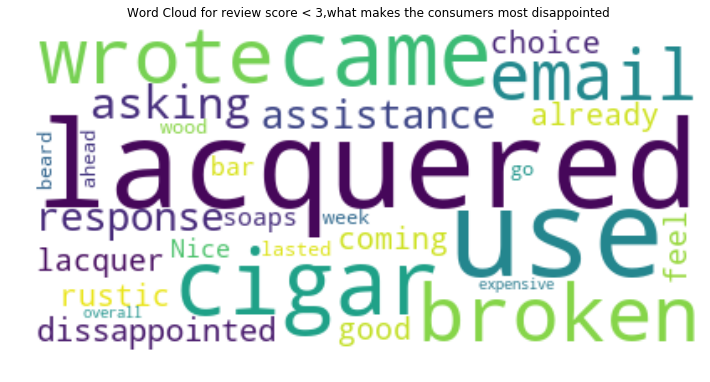

In [83]:
sample_1 = sample[sample.review_score < 5]
sample_2 = sample[sample.review_score < 3]

# str(sample.review_content.values)

# text = sample.review_content.values
text_1 = str(sample_1[sample_1.review_content.notnull()].review_content.values)
text_2 = str(sample_2[sample_2.review_content.notnull()].review_content.values)

stopwords = set(STOPWORDS)
# stopwords.update(["soap", "men", "man"])
stopwords.update(["twitter","drsquatchsoapco","drsquatch","dr squatch","https","soap","joshbilicki",'youtube','got','gift box','gift','box'])

# Generate a word cloud image
wordcloud1 = WordCloud(stopwords=stopwords, background_color="white").generate(text_1)
wordcloud2 = WordCloud(stopwords=stopwords, background_color='White').generate(text_2)
# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(12,9))
plt.imshow(wordcloud1,interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for review score < 5')
plt.show()

plt.figure(figsize=(12,9))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for review score < 3,what makes the consumers most disappointed')
plt.show()


In [72]:
# text = " ".join(review for review in data.content)
# print ("There are {} words in the combination of all review.".format(len(text)))


## K-means on non-perfect review content (review_score <5)

In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

text = sample_1[sample_1.review_content.notnull()].review_content.values

# Create TfidfVectorizer, and name it vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words = stopwords.words('english'), max_features=2000)

# Train the model with data
vectors_train = tfidf_vectorizer.fit_transform(text).toarray()

# Get the vocab of tfidf
wordspitts = tfidf_vectorizer.get_feature_names()

print(vectors_train.shape)

%time

from sklearn.cluster import KMeans
kmeans = KMeans( 4)
kmeans.fit(vectors_train)

print(kmeans)



(25, 334)
CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 10 µs
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lipengyuan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [85]:
assigned_cluster = kmeans.predict(vectors_train)

# print("cluster centers:")
# print(kmeans.cluster_centers_)
print('K-means on reviews, review_score <5')
top_centroids = kmeans.cluster_centers_.argsort()[:, -1:-11:-1]
print("top 10 features for each cluster:")
for num, centroid in enumerate(top_centroids):
    print("%d: %s" % (num, ", ".join(wordspitts[i] for i in centroid)))


K-means on reviews, review_score <5
top 10 features for each cluster:
0: nice, great, sent, gift, case, impressed, son, inlaw, quality, soap
1: one, soap, smell, fdsfdhsfkjsd, dsbkjsdbfkjdsbfjkdsbfkdjbfk, like, pine, got, used, smells
2: box, cigar, soap, gift, arrived, broken, like, disappointed, time, lacquered
3: day, delayed, father, well, would, hey, weeks, never, six, two


In [103]:
text_2 = sample_2[sample_2.review_content.notnull()].review_content.values

# Create TfidfVectorizer, and name it vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words = stopwords.words('english'), max_features=2000)

# Train the model with data
vectors_train = tfidf_vectorizer.fit_transform(text_2).toarray()

# Get the vocab of tfidf
wordspitts = tfidf_vectorizer.get_feature_names()

print(vectors_train.shape)

%time

kmeans = KMeans(3)

try:
    kmeans.fit(vectors_train)
    print(kmeans)
except:
    print ("Stopped, Not enough data for review_score <3")



(3, 34)
CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 9.06 µs
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


In [112]:
print('The infomation of review content which review_score <3, these info need to pay attention')
print(' ')
assigned_cluster = kmeans.predict(vectors_train)
print('All review content for review_score <3')
print(text_2)
# print("cluster centers:")
# print(kmeans.cluster_centers_)
print(' ')
print('K-means on review contents, review_score <3')
top_centroids = kmeans.cluster_centers_.argsort()[:, -1:-11:-1]
print(' ')
print("Top 10 features for each cluster:")
for num, centroid in enumerate(top_centroids):
    print("%d: %s" % (num, ", ".join(wordspitts[i] for i in centroid)))


The infomation of review content which review_score <3, these info need to pay attention
 
All review content for review_score <3
["I like the soap but my cigar box came broken.  I wrote an email asking for assistance and didn't get a response."
 'I was very dissappointed with the lacquered box. The lacquer was already coming off. Also I feel a lacquered box was not a good choice for the rustic soaps.'
 "Nice soap, but a bar lasted me about a week. I'll go ahead and use it for my beard, but it wood be too expensive to use this soap overall."]
 
K-means on review contents, review_score <3
 
Top 10 features for each cluster:
0: use, soap, ahead, go, week, expensive, wood, overall, nice, lasted
1: lacquered, box, feel, dissappointed, choice, good, lacquer, coming, rustic, soaps
2: wrote, get, asking, assistance, response, cigar, email, like, broken, came
